<a href="https://colab.research.google.com/github/UzzyMuzzy/Consumer/blob/main/Netflix_Users_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go



In [ ]:
df = pd.read_csv("Netflix User.csv")
df.head()



,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,5/9/2021,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/7/2022,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/5/2023,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
df.duplicated().sum() #checking there are no duplications

0

In [ ]:
df["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [ ]:
df = df.drop("Plan Duration", axis = 1)

In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


In [ ]:
sub_cnts = df['Subscription Type'].value_counts()
px.pie(sub_cnts, names=sub_cnts.index, values=sub_cnts.values, title='Distribution of Subscription Types',
       color_discrete_sequence=px.colors.sequential.Jet, hole=0.5)


Observations
- A substantial 40% of Netflix's userbase has chosen the Basic subscription plan as their preferred option.
- Approximately 30.7% of users have made the Standard plan their selection.
- The remaining 29.3% have opted for the Premium plan, following closely behind in popularity.
- It's evident that lower-priced subscription plans tend to be more appealing to customers, as the majority of Netflix users have enrolled in the Basic plan, which is the most economical choice available.

AGE DISTRIBUTION

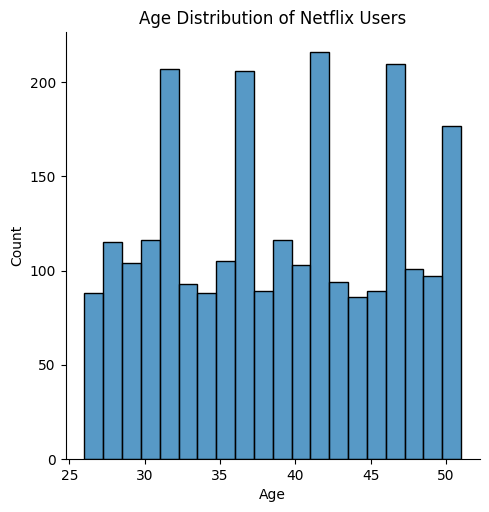

In [ ]:
sns.displot(df['Age'], bins = 20)
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Observations
- The dataset includes individuals with a minimum age of 26 years.
- Approximately 25% of users in the dataset are 32 years old or younger.
- Around 75% of the users in the dataset are 45 years old or younger.
- The dataset contains individuals with a maximum age of 51 years.


**Country Distribution **


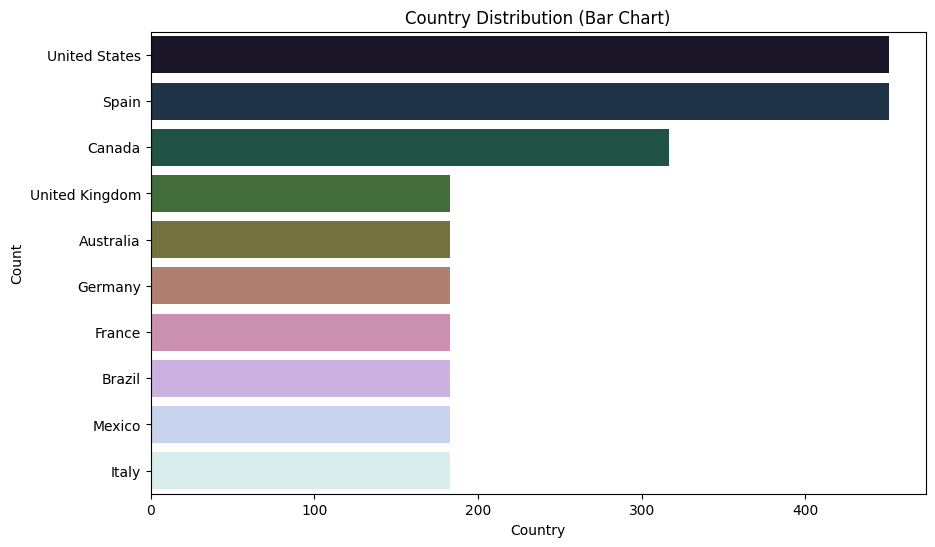

In [ ]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette= "cubehelix")
plt.title('Country Distribution (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Observations

- The united States boasts the largest Netflix user base.
- Spain holds the second position in terms of the quantity of Netflix users.
- Canada is in third place when it comes to the number of Netflix users.
   

Gender Distribution

In [ ]:
gender_count = df['Gender'].value_counts()
px.pie(gender_count, names=gender_count.index, values=gender_count.values, title='Gender Distribution', hole =0.5, color_discrete_sequence=px.colors.sequential.Blackbody)




Observations

- Based off the dataset, the distribution of genders is roughly equal, with slightly more females then males.

**Device Distribution **

In [ ]:
device_counts = df['Device']. value_counts()
px.pie(device_counts, names=device_counts.index,
       values=device_counts.values, title='Device Distribution',
       color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)

Observations

The utilization of various devices for Netflix access is evenly spread, with roughly 25% of users opting for a laptop, tablet, smartphone, or Smart TV, respectively. This indicates that Netflix is intentionally designed to provide convenient accessibility on a wide range of devices and platforms.

**Age Distribution by Subscription Type**

In [ ]:
px.box(df, x="Subscription Type", y="Age", color="Gender",
       notched=True, color_discrete_sequence=px.colors.sequential.Rainbow)

Observations

Basic Subscription
- Among male users, the age range (interquartile range) falls between 32 and 45.
- For female users, the age range (interquartile range) spans from 32 to 46.

Standard Subscription
- Male users have an age range (interquartile range) ranging from 33 to 44.75.
- Female users, on the other hand, exhibit an age range (interquartile range) between 34 and 45.

Premium Subscription

- Male users display an age range (interquartile range) from 32 to 44.5.
- Female users have an age range (interquartile range) from 32 to 46.

These findings indicate slight variations in age distribution among users with different subscription types (Basic, Standard, and Premium). For instance, in the case of the Basic subscription, the age range for females is slightly broader than that for males.

**Monthly Revenue by COuntry and Subscription Type**

In [ ]:
fig = px.sunburst(df, path=["Country", "Subscription Type"],
                  values="Monthly Revenue", title="Sunburst Chart with Text Labels")
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

Observations

In the United States, Basic subscription is chosen by 44% of users, while Standard and Premium are selected by 24% and 32% of users, respectively. In Spain, 24% go for Basic, 28% for Standard, and 47% for Premium. Canada sees 46% opting for Basic, 27% for Standard, and 27% for Premium. The United Kingdom has a strong preference for the Standard plan, with 98% of users selecting it. In Italy, 96% of users opt for the Basic plan. France shows a split with 19% choosing Basic and 81% going for Premium. Brazil has 80% selecting Basic, 4% Standard, and 16% Premium. In Australia, 12% prefer Basic, 28% go for Standard, and 55% choose Premium. Germany has 81% selecting Basic, 12% Standard, and 7% Premium. In Mexico, the Standard plan is highly favored, with 98% of users choosing it.

Overall, the Basic plan is popular in the United States, Canada, Italy, Brazil, and Germany, while the Standard plan is favored in the United Kingdom and Mexico. On the other hand, the Premium plan is the preferred choice in Spain, France, and Australia.

**Monthly Revenue by Country**

In [ ]:
px.choropleth(df, locations="Country", locationmode="country names",
              color="Monthly Revenue", title="Choropleth Map of Monthly Revenue by Country")

Observations

The United States leads in terms of Monthly Revenue, with Spain following closely in the second position, and Canada securing the third spot in Monthly Revenue rankings.

**Monthly User Sign-ups and Last Payments**

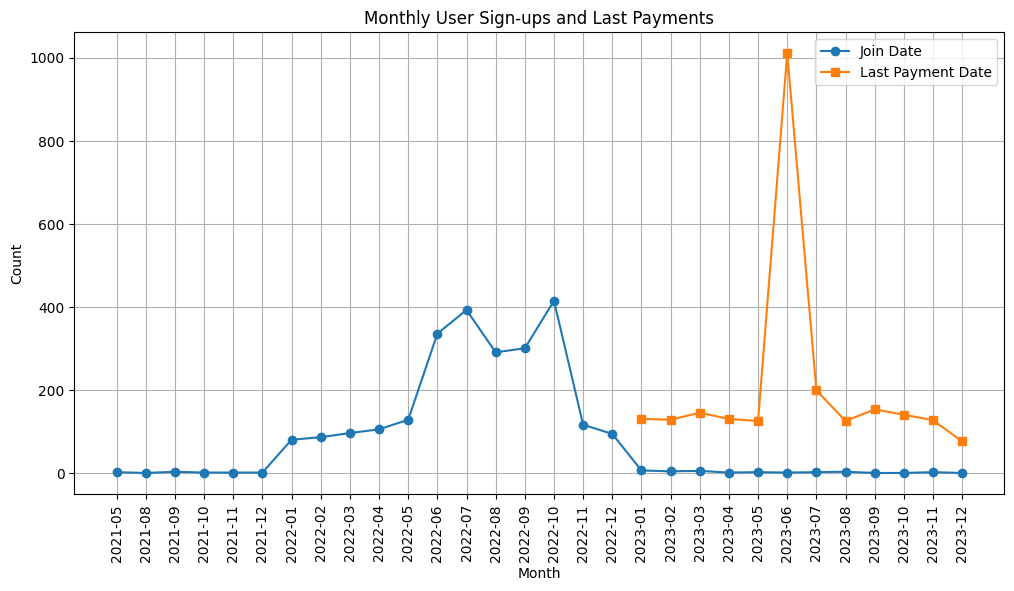

In [ ]:
df['Join Month'] = df['Join Date'].dt.strftime('%Y-%m')
df['Last Payment Month'] = df['Last Payment Date'].dt.strftime('%Y-%m')

monthly_join_counts = df['Join Month'].value_counts().sort_index()
monthly_payment_counts = df['Last Payment Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_join_counts.index, monthly_join_counts.values, label='Join Date', marker='o')
plt.plot(monthly_payment_counts.index, monthly_payment_counts.values, label='Last Payment Date', marker='s')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly User Sign-ups and Last Payments')
plt.xticks(rotation="vertical")
plt.legend()
plt.grid(True)
plt.show()




Observations

In the year 2022, a notable surge in signups was observed from May to July, with sustained growth throughout the month of July. Subsequently, a marginal decrease in signups occurred in August and September, followed by a peak in October, after which there was a gradual decline in signups beginning in November.

Additionally, the observation that a substantial portion of users' last payment dates falls in June 2023 raises concerns regarding a significant number of subscription discontinuations, which may warrant attention from Netflix.

**Conlusion**



In a detailed analysis, it has been discerned that a substantial 40% of Netflix users gravitate towards the Basic subscription plan, solidifying its position as the most favored choice among subscribers. The Standard plan finds favor with approximately 30.7% of users, while the Premium plan is the selection of around 29.3% of the user base. This trend underlines the magnetism of lower-priced subscription plans, which tend to attract a more considerable number of customers.

In terms of user demographics, the age spectrum in the dataset spans from a minimum of 26 years to a maximum of 51 years. A quarter of the users fall within the age bracket of 32 years or younger, while a substantial 75% of users are 45 years old or younger.

Geographically, the United States emerges as the stronghold of Netflix users, followed by Spain and Canada, thus reflecting the platform's wide-reaching appeal.

An examination of the gender distribution reveals a nearly balanced representation, with a slightly higher presence of females compared to males among Netflix users.

The manner in which users access Netflix portrays a well-distributed pattern, with an approximate quarter of users employing a variety of devices, encompassing laptops, tablets, smartphones, and Smart TVs.

Intriguingly, the analysis exposes subtle variations in the age distribution of users based on their subscription types. Notably, the interquartile range (IQR) for the age of Basic subscribers exhibits slight distinctions between males and females.

Delving deeper into subscription preferences, it is evident that the Basic plan enjoys popularity in the United States, Canada, Italy, Brazil, and Germany. In contrast, the United Kingdom and Mexico show a proclivity for the Standard plan, while the Premium plan garners preference in Spain, France, and Australia.

Examining temporal trends in user sign-ups unravels noteworthy fluctuations. In 2022, a substantial surge in new user registrations was observed, with a significant peak in October. However, following November, there was a discernible decline in new sign-ups, potentially attributable to seasonal factors or market saturation. Furthermore, the observation that a substantial cohort of users registered their last payment in June 2023 raises concerns about a potential decline in user engagement around that period, warranting closer scrutiny.

In summation, the data delineates a distinct inclination toward the Basic Netflix plan, which is positioned as the most economical choice, while concurrently presenting valuable insights into user demographics, geographical distributions, and trends in subscription behavior.